# Suicides  rates Overview 1985 - 2015

In this notebook, we will analyse a csv dataset which has the data of suicides number recorded around the world from 1985 to 2015. You can get the dataset [here](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). In this notebook we load and clean the data and analyze the data by drawing visualizations using matplotlib and seaborn libraries.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
dataset_url = 'https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016' 

In [4]:
!pip install jovian opendatasets --upgrade --quiet

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: navyasrikelam
Your Kaggle Key: ········


100%|██████████| 397k/397k [00:00<00:00, 16.5MB/s]

In [6]:
data_dir = './suicide-rates-overview-1985-to-2016'

In [7]:
import os
os.listdir(data_dir)

['master.csv']

In [8]:
project_name = "suicide-rate analysis-project-1" 

## Data Prepararion and Cleaning

In [9]:
import pandas as pd

In [10]:
rawdata_df = pd.read_csv(data_dir + '/master.csv')
rawdata_df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let's change the column names so that it would be easy for pandas to access them.

In [11]:
rawdata_df.columns = ['country','year','sex','age','suicides_no','population','suicides_per_100k_pop','country_year','hdi_for_year','gdp_for_year','gdp_per_capita','generation']

In [12]:
rawdata_df.head(2)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country_year,hdi_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [13]:
rawdata_df.sex.unique()

array(['male', 'female'], dtype=object)

let's change the datatype to category since there are only two different objects. By doing this the memory size gets reuced which ultimately improves speed.

In [14]:
rawdata_df.sex = rawdata_df.sex.astype('category')

In [15]:
rawdata_df.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

* `Generation X` is generally defined as people born from 1965 to 1980.
* `Silent` generation implies those people who were born from 1928 to 1945.
* `G.I. Generation` is generally defined as people born from 1901 to 1927. 
* `Boomers` generation is generally defined as people born from 1946 to 1964, during the post–World War II baby boom.
* `Millenials` generation defined as people born from 1981 to 1996, Most millennials are the children of baby boomers and early Gen Xers.

* `Generation Z` also called as Gen z and zoomers is defined as people born from 1990 to 2010.

> Let's change this column to category type by using `astype` method

In [16]:
rawdata_df.generation = rawdata_df.generation.astype('category')

In [17]:
rawdata_df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [18]:
rawdata_df.age = rawdata_df.age.astype('category')

In [19]:
rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                27820 non-null  object  
 1   year                   27820 non-null  int64   
 2   sex                    27820 non-null  category
 3   age                    27820 non-null  category
 4   suicides_no            27820 non-null  int64   
 5   population             27820 non-null  int64   
 6   suicides_per_100k_pop  27820 non-null  float64 
 7   country_year           27820 non-null  object  
 8   hdi_for_year           8364 non-null   float64 
 9   gdp_for_year           27820 non-null  object  
 10  gdp_per_capita         27820 non-null  int64   
 11  generation             27820 non-null  category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 2.0+ MB


To access columns, we need to rename them by using `.rename` method.

In [20]:
rawdata_df.hdi_for_year.isnull().sum()/rawdata_df.shape[0]

0.699352983465133

> This shows that almost 70 % of the data in `hdi_for_year` column has `Nan values`, so let's drop this column from our dataset.

In [21]:
rawdata_df.drop(columns='hdi_for_year',axis = 1,inplace = True)

In [22]:
rawdata_df.head(3)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X


## Exploring the dataset

In [23]:
countries = rawdata_df.country.unique()
print(countries)
print('This dataset has the data of {} countries'.format(len(countries)))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [24]:
rawdata_df.describe()

,year,suicides_no,population,suicides_per_100k_pop,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [25]:
country_df=rawdata_df.groupby("country")[['sex','suicides_per_100k_pop','suicides_no']].sum()
#country_df.head(6)

In [26]:
sorted_country_df = country_df.sort_values('suicides_per_100k_pop',ascending = False)

### Countries with highest number of suicides per 100k population

In [27]:
sorted_country_df.head(6)

,suicides_per_100k_pop,suicides_no
country,,
Russian Federation,11305.13,1209742
Lithuania,10588.88,28039
Hungary,10156.07,73891
Kazakhstan,9519.52,101546
Republic of Korea,9350.45,261730
Austria,9076.23,50073


In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
type(sorted_country_df.index)

pandas.core.indexes.base.Index

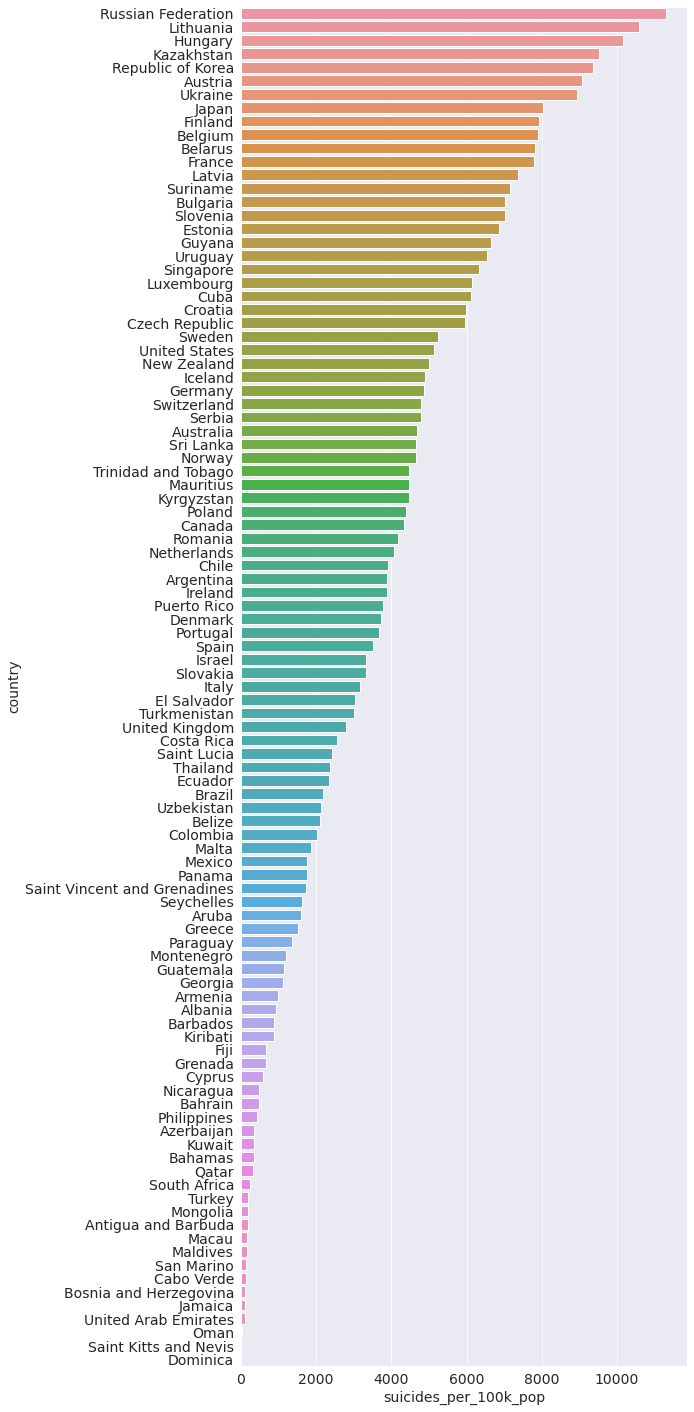

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(8, 25))

sns.barplot(x='suicides_per_100k_pop',y=sorted_country_df.index,data= sorted_country_df);


In [31]:
mask = sorted_country_df['suicides_per_100k_pop'] > 7500
high_suicides_df = sorted_country_df[mask]
country_list = high_suicides_df.index
high_suicides_df
#mask1 = rawdata_df['country'] in country_list

,suicides_per_100k_pop,suicides_no
country,,
Russian Federation,11305.13,1209742
Lithuania,10588.88,28039
Hungary,10156.07,73891
Kazakhstan,9519.52,101546
Republic of Korea,9350.45,261730
Austria,9076.23,50073
Ukraine,8931.66,319950
Japan,8025.23,806902
Finland,7924.11,33677


In [32]:
country_list = list(country_list)

print('The countries which recorded maximum suicides')
country_list

The countries which recorded maximum suicides


['Russian Federation',
 'Lithuania',
 'Hungary',
 'Kazakhstan',
 'Republic of Korea',
 'Austria',
 'Ukraine',
 'Japan',
 'Finland',
 'Belgium',
 'Belarus',
 'France']

In [33]:
search_values = country_list

filtered_df = rawdata_df[rawdata_df.country.str.contains('|'.join(search_values ))]

filtered_df

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country_year,gdp_for_year,gdp_per_capita,generation
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,"69,386,774,475",9759,G.I. Generation
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,"69,386,774,475",9759,G.I. Generation
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,"69,386,774,475",9759,Silent
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,"69,386,774,475",9759,Boomers
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,"69,386,774,475",9759,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...
26399,Ukraine,2015,female,35-54 years,427,6309963,6.77,Ukraine2015,"91,030,959,455",2256,Generation X
26400,Ukraine,2015,female,15-24 years,117,2281055,5.13,Ukraine2015,"91,030,959,455",2256,Millenials
26401,Ukraine,2015,female,25-34 years,168,3421535,4.91,Ukraine2015,"91,030,959,455",2256,Millenials
26402,Ukraine,2015,male,5-14 years,33,2131084,1.55,Ukraine2015,"91,030,959,455",2256,Generation Z


In [34]:
gdp_df = filtered_df.pivot_table(index=['year'], columns='country', values='gdp_per_capita')
gdp_df.head(4)

country,Austria,Belarus,Belgium,Finland,France,Hungary,Japan,Kazakhstan,Lithuania,Republic of Korea,Russian Federation,Ukraine
year,,,,,,,,,,,,
1985,9759.0,NaN,9356.0,NaN,10765.0,NaN,12401.0,NaN,NaN,2731.0,NaN,NaN
1986,13911.0,NaN,12992.0,NaN,14940.0,NaN,18288.0,NaN,NaN,3078.0,NaN,NaN
1987,17415.0,NaN,16165.0,19861.0,17999.0,NaN,22137.0,NaN,NaN,3834.0,NaN,1353.0
1988,18663.0,NaN,17509.0,23546.0,19534.0,NaN,26687.0,NaN,NaN,5089.0,NaN,1571.0


In [35]:
suicides_df = filtered_df.pivot_table(index=['year'], columns='country', values='suicides_per_100k_pop')
suicides_df.head(5)

country,Austria,Belarus,Belgium,Finland,France,Hungary,Japan,Kazakhstan,Lithuania,Republic of Korea,Russian Federation,Ukraine
year,,,,,,,,,,,,
1985,32.067500,NaN,27.670000,NaN,29.075000,NaN,25.039167,NaN,NaN,12.220833,NaN,NaN
1986,33.483333,NaN,26.224167,NaN,29.314167,NaN,26.962500,NaN,NaN,11.942500,NaN,NaN
1987,33.823333,NaN,27.313333,28.945833,27.585833,NaN,24.607500,NaN,NaN,10.686667,NaN,24.503333
1988,29.803333,NaN,23.650000,29.503333,26.060000,NaN,23.726667,NaN,NaN,9.548333,NaN,23.893333
1989,29.943333,NaN,23.737500,31.113333,26.044167,NaN,21.951667,NaN,NaN,10.116667,33.235,26.360000


#### Trend of gdp_per_capita in countries with highest number of suicides

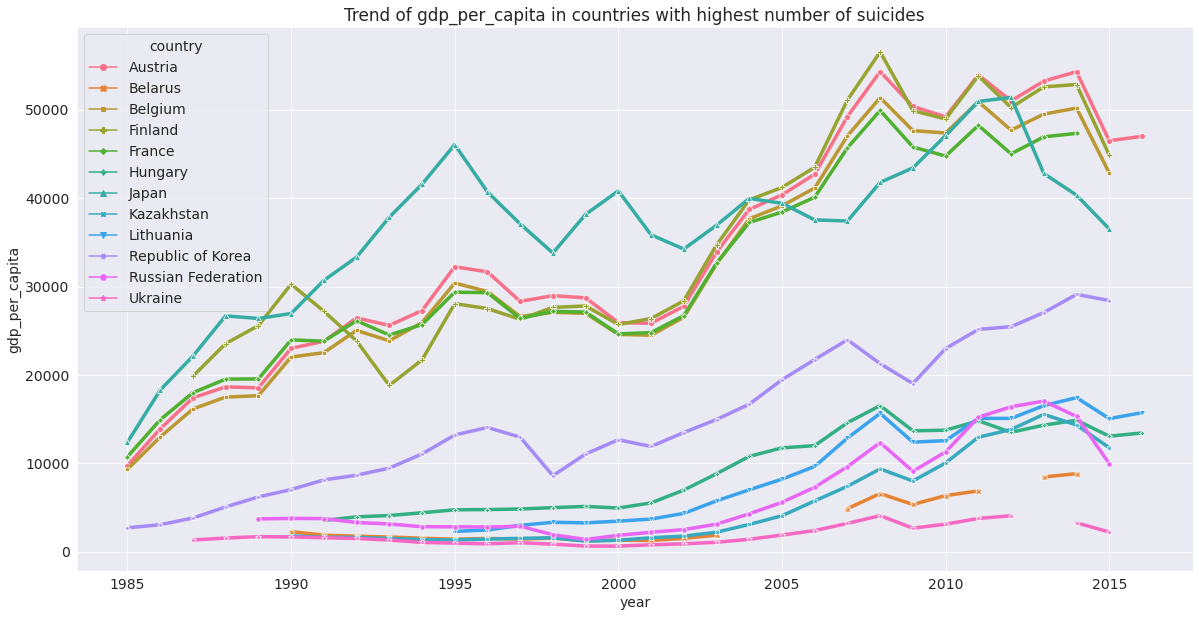

In [36]:
plt.figure(figsize=(20,10))

sns.lineplot(data=gdp_df,linewidth = 3.5,markers = True,dashes = False);
plt.xlabel('year')
plt.ylabel('gdp_per_capita')
plt.title('Trend of gdp_per_capita in countries with highest number of suicides');

As you see there is a significant increase in `gdp_per_capita` of these countries (the countries with highest suicides per 100k population), this implies that the  average living standards and economic wellbeing are improving. 

> However we should also remember that gdp_per_capita is a measure of country's overall economic performance and not a measure of personal income.

Now let's see the trend of suicides per 100k population in these countries over the past few years.

#### Trend of suicides per 200k population in countries with highest number of suicides

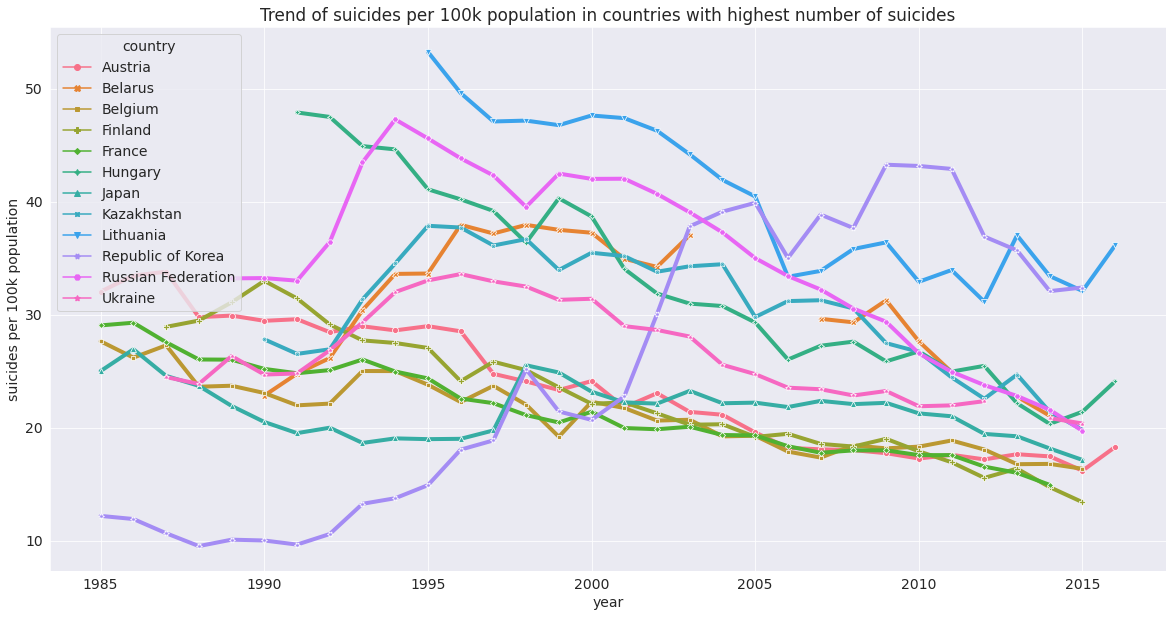

In [39]:
plt.figure(figsize=(20,10))

sns.lineplot(data=suicides_df,linewidth = 4,markers = True,dashes = False);
plt.xlabel('year')
plt.ylabel('suicides per 100k population')
plt.title('Trend of suicides per 100k population in countries with highest number of suicides');

> The graph is a bit complicated because in the previous grph we have seen that almost all countries showed an `improved gdp_per_capita`. But there is significantly less decrease in `suicides per 100k population` in countries like `Japan, Austria, Belgium` . 
* The situation in Republic of Korea is different. It has increasing trends of both `gdp per capita and suicides per 100k population` .

Let's see what is happening in Japan and then Republic of Korea.



### Japan 

In [40]:
Japan_df = rawdata_df[rawdata_df.country.str.contains('Japan',case=False)]


In [41]:
japan_year_df = Japan_df.groupby('year')[['suicides_no','population','gdp_per_capita','suicides_per_100k_pop']].sum()

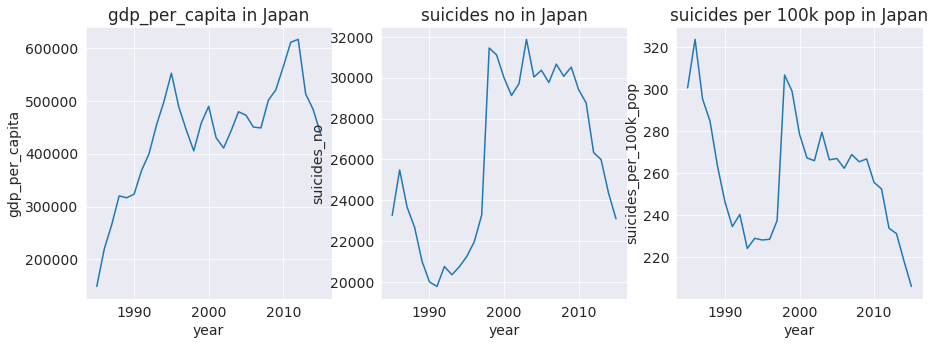

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].set_title('gdp_per_capita in Japan')
sns.lineplot(x=japan_year_df.index,y='gdp_per_capita',data = japan_year_df,ax = axes[0]);

axes[1].set_title('suicides no in Japan')
sns.lineplot(x = japan_year_df.index, y = 'suicides_no' , data = japan_year_df , ax = axes[1]);

axes[2].set_title('suicides per 100k pop in Japan')
sns.lineplot(x = japan_year_df.index , y = 'suicides_per_100k_pop', data = japan_year_df , ax = axes[2]);

The Population of Japan is as expected is increasing. From the graph( Suicides no in Japan ), there is a sharp rise in total suicides number in the country from 1991 has hit the peak at the 2000s. 
This is because, in the 1990s, the Japanese economy suffered a prolonged recession that followed the collapse of the fabled economic bubble of the 1980s. `Japan's 'Lost Decade' lasted about 1991 to 2001.`

> The main causes of this economic slowdown were raising interest rates that set a liquidity trap at the same time the credit crunch was unfolding.
>  In this period many Japanese companies replaced a large part of their workforce with temporary workers who had little job security and fewer benefits. `As of 2009, these non-traditional employees made up more than a third of the labor.`

   This shows that there is a lot more influence of economy/ GDP per capita of the country on suicides number in the country.
    
Now let's go through `The Republic of Korea` or `North Korea`.

### Republic of Korea ( North Korea )

In [43]:
korea_df = rawdata_df[rawdata_df.country.str.contains('Republic of Korea',case=False)]
korea_df.head(5)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country_year,gdp_for_year,gdp_per_capita,generation
20230,Republic of Korea,1985,male,75+ years,42,154800,27.13,Republic of Korea1985,"100,273,097,170",2731,G.I. Generation
20231,Republic of Korea,1985,male,55-74 years,393,1498300,26.23,Republic of Korea1985,"100,273,097,170",2731,G.I. Generation
20232,Republic of Korea,1985,male,35-54 years,903,4285700,21.07,Republic of Korea1985,"100,273,097,170",2731,Silent
20233,Republic of Korea,1985,male,25-34 years,655,3616800,18.11,Republic of Korea1985,"100,273,097,170",2731,Boomers
20234,Republic of Korea,1985,male,15-24 years,678,4413000,15.36,Republic of Korea1985,"100,273,097,170",2731,Generation X


In [44]:
korea_year_df = korea_df.groupby('year')[['suicides_no','population','gdp_per_capita','suicides_per_100k_pop']].sum()

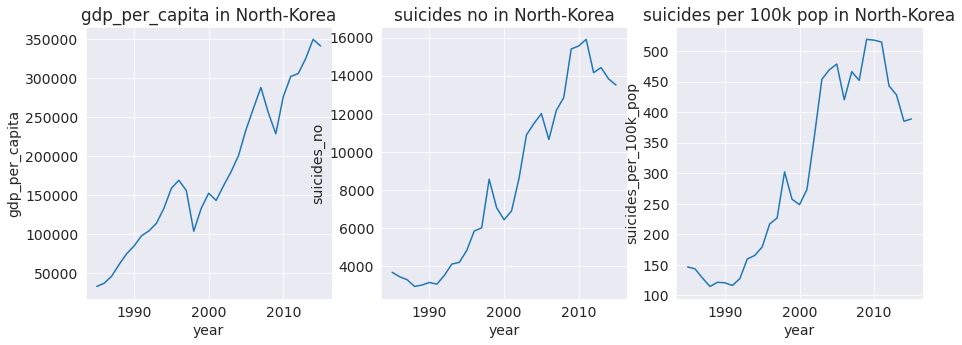

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].set_title('gdp_per_capita in North-Korea')
sns.lineplot(x=korea_year_df.index,y='gdp_per_capita',data = korea_year_df,ax = axes[0]);

axes[1].set_title('suicides no in North-Korea')
sns.lineplot(x = korea_year_df.index, y = 'suicides_no' , data = korea_year_df , ax = axes[1]);

axes[2].set_title('suicides per 100k pop in North-Korea')
sns.lineplot(x = korea_year_df.index , y = 'suicides_per_100k_pop', data = korea_year_df , ax = axes[2]);

> In North-korea, gdp_per_capita or country's economy or the average standards of living of people is not the cause of increasing number of suicides.

Let's see the trend of suicides number based on age.

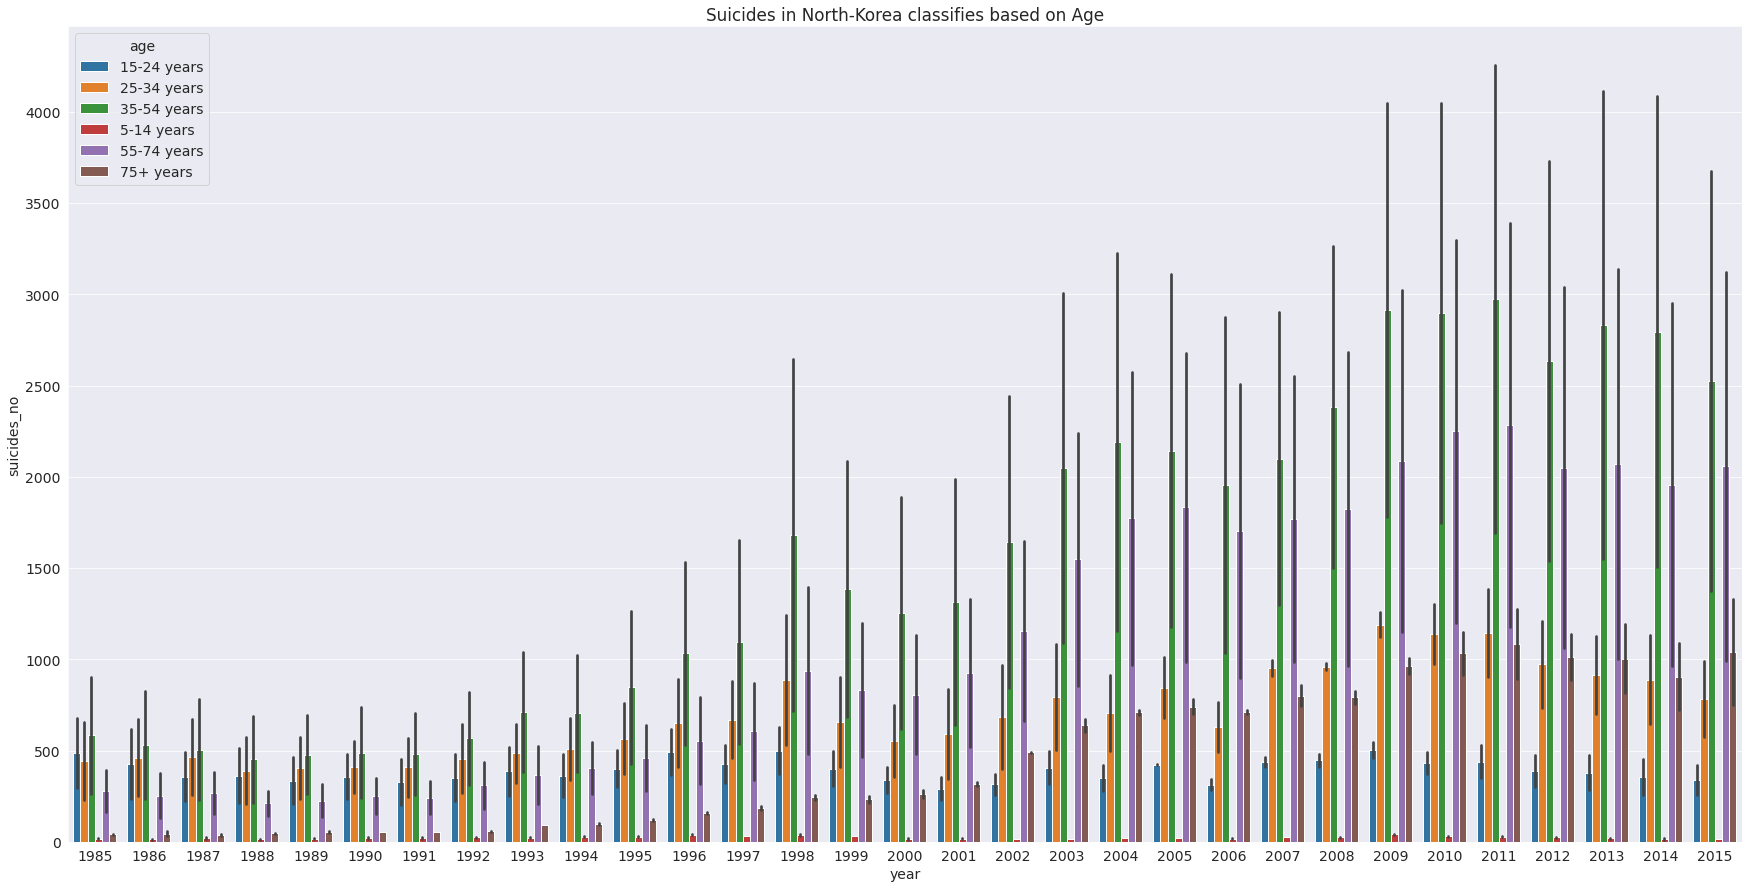

In [46]:
fig, axes = plt.subplots(1,1, figsize = (30,15))

sns.barplot(x='year',y='suicides_no',hue='age',data=korea_df)
plt.title('Suicides in North-Korea classifies based on Age')
plt.xlabel('year')
plt.ylabel('suicides_no');

* From 1985 to 2015 two age groups were recorded almost the same suicides_no, `5 - 14 years and 15 - 24 years.`
* Things started to change from 1995 (or around).
* The suicides_no of age grp `75+ years` recorded very less up to 1993 and 1994 but from there, there is an unreduced increase in suicides number in this age grp. It hit a peak in 2015.
* Most people in the `35 - 54 years` age group have committed suicides and the number has been showing a lot for variance since 1995.
* Next to this (35 - 54 years) age grp `55 - 74 years` recorded more number of suicides.

The thing is even though the country's economy is stable and their standards of livings are good, there is an unreduced trend in suicide number in all age groups.

Now let's see the suicides based on gender in North - Korea.

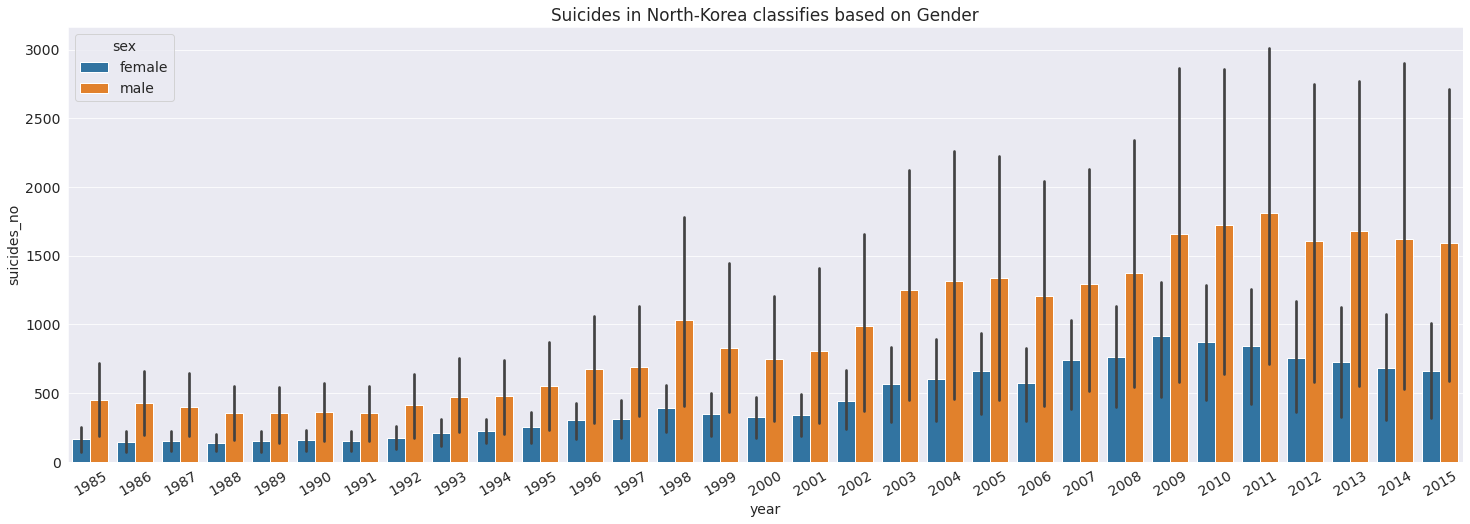

In [47]:
fig, axes = plt.subplots(1,1, figsize = (25,8))

sns.barplot(x='year',y='suicides_no',hue='sex',data=korea_df)
plt.title('Suicides in North-Korea classifies based on Gender')
plt.xlabel('year')
plt.xticks(rotation = 30)
plt.ylabel('suicides_no');

> The `North Korean famine`, also known as the `Arduous March` or the March of Suffering, was a period of mass starvation together with a `general economic crisis from 1994 to 1998 in North Korea`. 
* It was not merely a shortage of food but a colossal failure by the North Korean government. The cause of the rise of suicides from 1994 can be explained with this to some extinct.
* But it isn't just famine and economic breakdown but North Korea's human rights record is often considered to be the worst in the world and has been globally condemned, with the United Nations, the European Union, and groups such as Human Rights Watch all critical of the country's record.
`The UN says North Koreans live under "systematic, widespread and gross human rights violations"`. One example, if a person commits suicide, then severe punishment was imposed on his/her family for three consecutive generations. So, to avoid this they do collective suicides. 

Not only proper economic standards but also establishing proper `Human Rights` is important for proper living. `North Korea with gross human rights violation has become the worst place to live in` . 

In [48]:
rawdata_df = rawdata_df[rawdata_df.year < 2016]

Now let's see the trend of total suicides number all over the world on the basis of gender.

###  World

##### Now let's analyze the number of the suicide in the world based on age

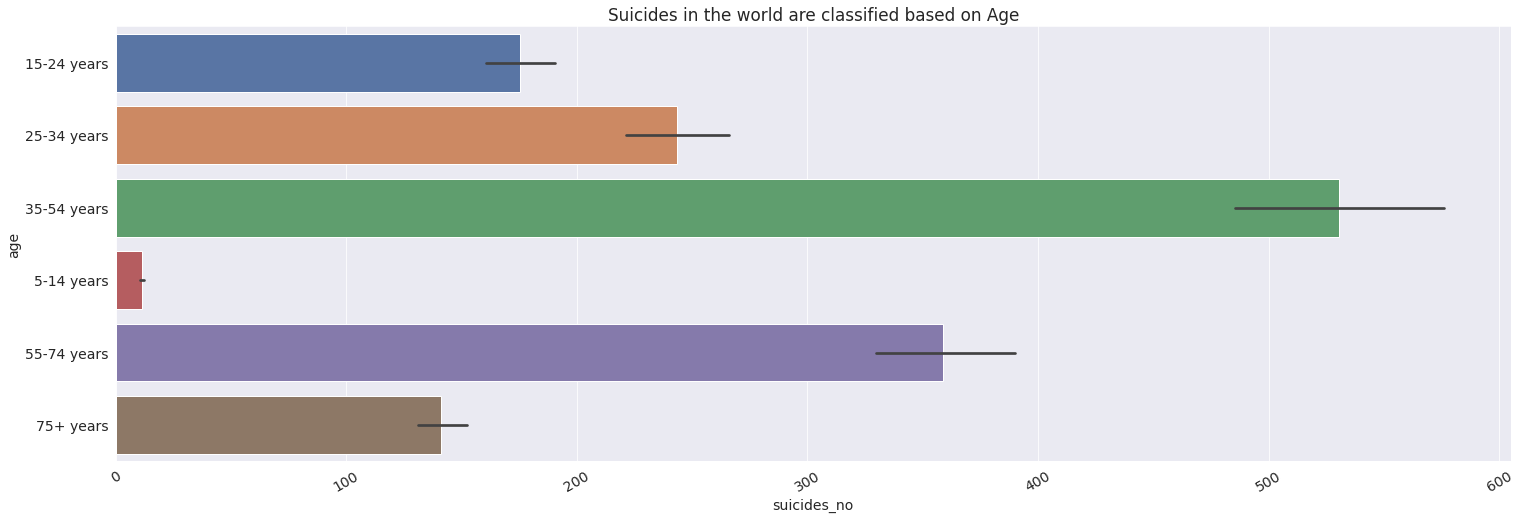

In [49]:
fig, axes = plt.subplots(1,1, figsize = (25,8))

sns.barplot(x='suicides_no',y='age',palette = 'deep',data=rawdata_df)
plt.title('Suicides in the world are classified based on Age')
plt.xlabel('suicides_no')
plt.xticks(rotation = 30)
plt.ylabel('age');

> On average every year, people in the age group of 35-54 years are more likely to commit suicide, followed by the 55-74 years age group and people within 25-34 years.

##### Based on Gender

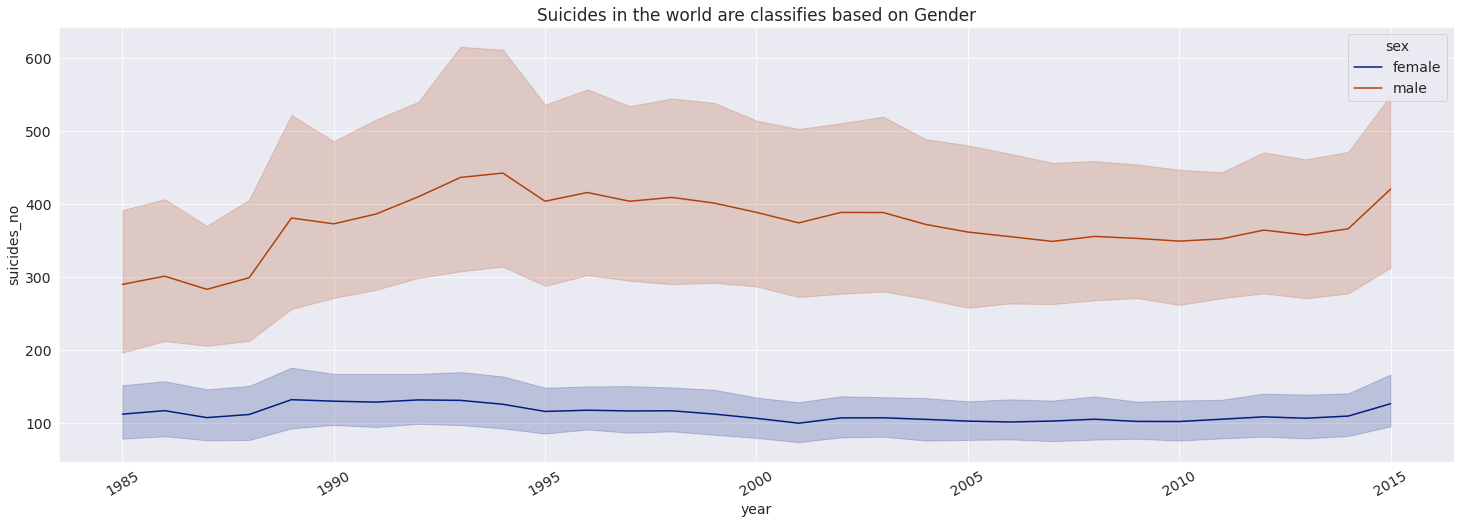

In [50]:
fig, axes = plt.subplots(1,1, figsize = (25,8))

sns.lineplot(x='year',y='suicides_no',hue='sex',palette = 'dark',data=rawdata_df)
plt.title('Suicides in the world are classifies based on Gender')
plt.xlabel('year')
plt.xticks(rotation = 30)
plt.ylabel('suicides_no');

  As you see the suicide number of men is 3 times or higher every year. 
*  According to a study, women are more diagnosed with depression and stress but men commit more suicides than women. This is because women try to open up and discuss their problems but men struggle to discuss their mental problems at the workplace for fear of losing their job or promotion. Lack of friendships impacts men's mental health.
> “Traditionally, a man’s role has been centered around employment and being productive and having worked as a core source of their life and purpose".

This can contribute to higher rates of anxiety and depression, as well as suicide in men.

##### Now let's see how the count of suicides_no vary with generation.

In [51]:
boomers_no = rawdata_df[rawdata_df['generation'] == 'Boomers']['suicides_no'].sum()
gi_no = rawdata_df[rawdata_df['generation'] == 'G.I. Generation']['suicides_no'].sum()
gen_x_no = rawdata_df[rawdata_df['generation'] == 'Generation X']['suicides_no'].sum()
gen_z_no = rawdata_df[rawdata_df['generation'] == 'Generation Z']['suicides_no'].sum()
millenials_no = rawdata_df[rawdata_df['generation'] == 'Millenials']['suicides_no'].sum()
silent_no = rawdata_df[rawdata_df['generation'] == 'Silent']['suicides_no'].sum()
()

l1 = ['Boomers','G.I. Generation','Generation X','Generation Z','Millenials','Silent']
l = [boomers_no,gi_no,gen_x_no,gen_z_no,millenials_no,silent_no]

In [52]:
df = pd.DataFrame(list(zip(l1, l)),
               columns =['Generation', 'suicides_no'])
df

,Generation,suicides_no
0,Boomers,2279783
1,G.I. Generation,510009
2,Generation X,1527038
3,Generation Z,15906
4,Millenials,620194
5,Silent,1779887


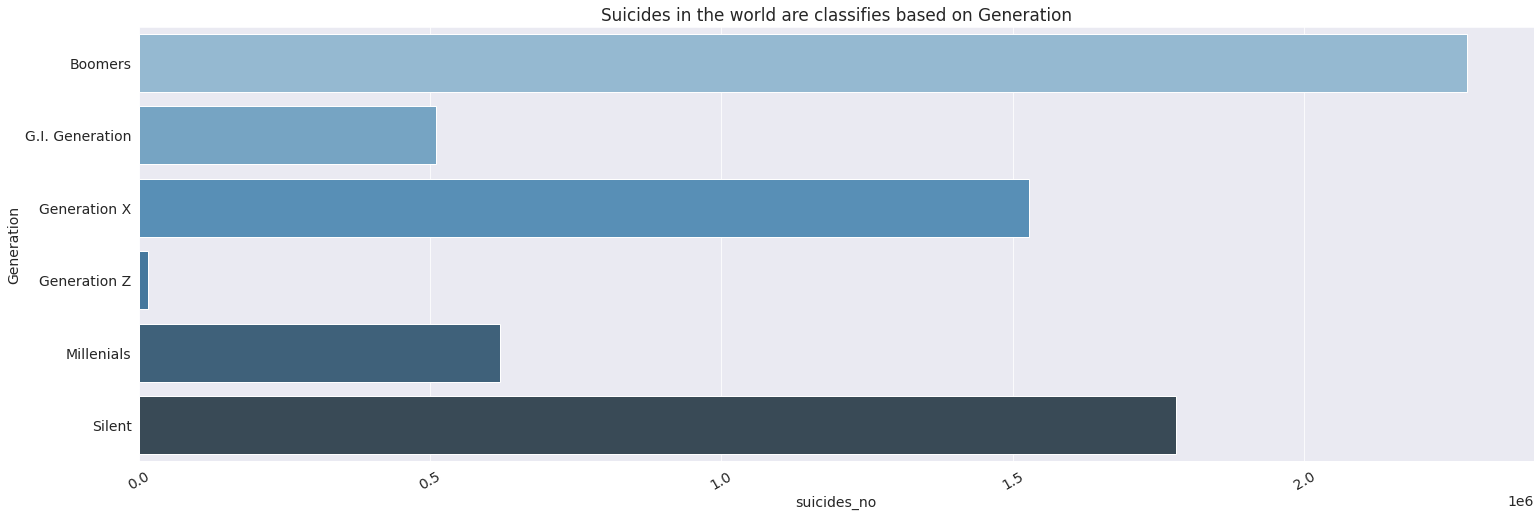

In [53]:
fig, axes = plt.subplots(1,1, figsize = (25,8))

sns.barplot(x='suicides_no',y='Generation',palette = 'Blues_d',data=df)
plt.title('Suicides in the world are classifies based on Generation')
plt.xlabel('suicides_no')
plt.xticks(rotation = 30)
plt.ylabel('Generation');

* `Generation X` is generally defined as people born from 1965 to 1980.
* `Silent` generation implies those people who were born from 1928 to 1945.
* `G.I. Generation` is generally defined as people born from 1901 to 1927. 
* `Boomers` generation is generally defined as people born from 1946 to 1964, during the post–World War II baby boom.
* `Millenials` generation defined as people born from 1981 to 1996, Most millennials are the children of baby boomers and early Gen Xers.

* `Generation Z` also called Gen z and zoomers are defined as people born from 1990 to 2010.

Highest number of suicids are seen in boomers that is in the people who were born in 1946 to 1964.

# Inferences and Conclusion

* On an average Russian federation has highest number of suicides per 100k population than any other country in the world.
* Based on the analysis we done in Japan, it says that the 'Lost Decade' caused an serious economic break down which badly affected GDP per capita and that made the suicide number rise. This means any change in GDP per capita(economic situation in the country) seriouly affects the suicide number.
* In North Korea, even though the GDP per capita shows an increasing trend there is no reduction in suicides number. The suicide number is continuously progressing showing a greater variance than the previous year. This is because there is a gross human rights violation in North Korea. The increase in suicides is the consequence of inhuman laws, cruel punishments, and the restricted environment beneath the Kim family. This states that not only GDP but also the establishment of proper human rights is very vital for any country for proper and peaceful living.
* Men are more likely to commit suicide as compared to women. In any part of the world, the suicide rate of men is at least three times higher than that of women. The reason is men struggle to open up and address their problems with others or in their workplace for they would be judged or fear of losing their job or promotion. Lack of proper friendships is also one of the reasons for the high suicide number in men.
* Coming to the age factor, people in the age group of 35-54 are largely prone to commit suicide. In most cases, financial problems have been a common motivator along with other reasons like health issues, loss of loved ones, etc...
* Boomers followed by Silent generation commit more number of suicides.
* 

# References and Future work

* Suicide Rates Overview 1985 to 2016 | Kaggle(https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)
* Lost Decade (Japan) - Wikipedia (https://www.bing.com/search?q=Japan+in+1990s&qs=n&form=QBRE&sp=-1&pq=japan+in+1990s&sc=6-14&sk=&cvid=BF390DEDF62447C2BD67F8C5F498DE17#)
* North Korea's suicide rate among worst in world, says WHO report (https://www.theguardian.com/world/2014/sep/04/north-korea-suicide-rate-among-worst-world-who-report)
* Overview of the Korean economy in the 1980s and 1990s(https://www.kdevelopedia.org/Development-Overview/official-aid/overview-koreeconomy-1980s-1990s--201412170000439.do)
* Why more men than women die by suicide(https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women)
* Work can be done to analyze and find the reason for no or low suicide rate in some countries like Saint Kitts and Nvis, Dominicia, Oman, UAE.

In [38]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "navyasrikelam1/suicide-rate-analysis-project-1" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/navyasrikelam1/suicide-rate-analysis-project-1


'https://jovian.ai/navyasrikelam1/suicide-rate-analysis-project-1'